<a href="https://colab.research.google.com/github/KirtanaAryasomyajula/Project-Portfolio/blob/main/mobilePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOBILE PRICE PREDICTION**

**Objective:**

To predict the price of mobile phones based pn various factors like Weight,resolution,ppi,cpu core,internal memory,Ram,battery and thickness.

Target Label: Price(Continuous)

**Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
mobile = pd.read_csv('/content/Cellphone.csv')

**Checking first 5 rows**

In [3]:
mobile.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


**Checking the number of rows and columns**

In [4]:
mobile.shape

(161, 14)

Rows: 161
Columns: 14

**Checking the datatypes of features**

In [5]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB



There are no object data types i.e there is no categorical data.

**Checking the summary of numerical columns**

In [6]:
mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


Renaming the column 'resoloution' to 'resolution'

In [7]:
mobile = mobile.rename(columns = {'resoloution':'resolution'})

**Checking for null  values**

In [8]:
mobile.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resolution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


There are no missing values in the data.

Since there are no categorical columns first we need to look for outliers and deal with it if they are present.

**Heatmap(Checking for correlation)**

<Axes: >

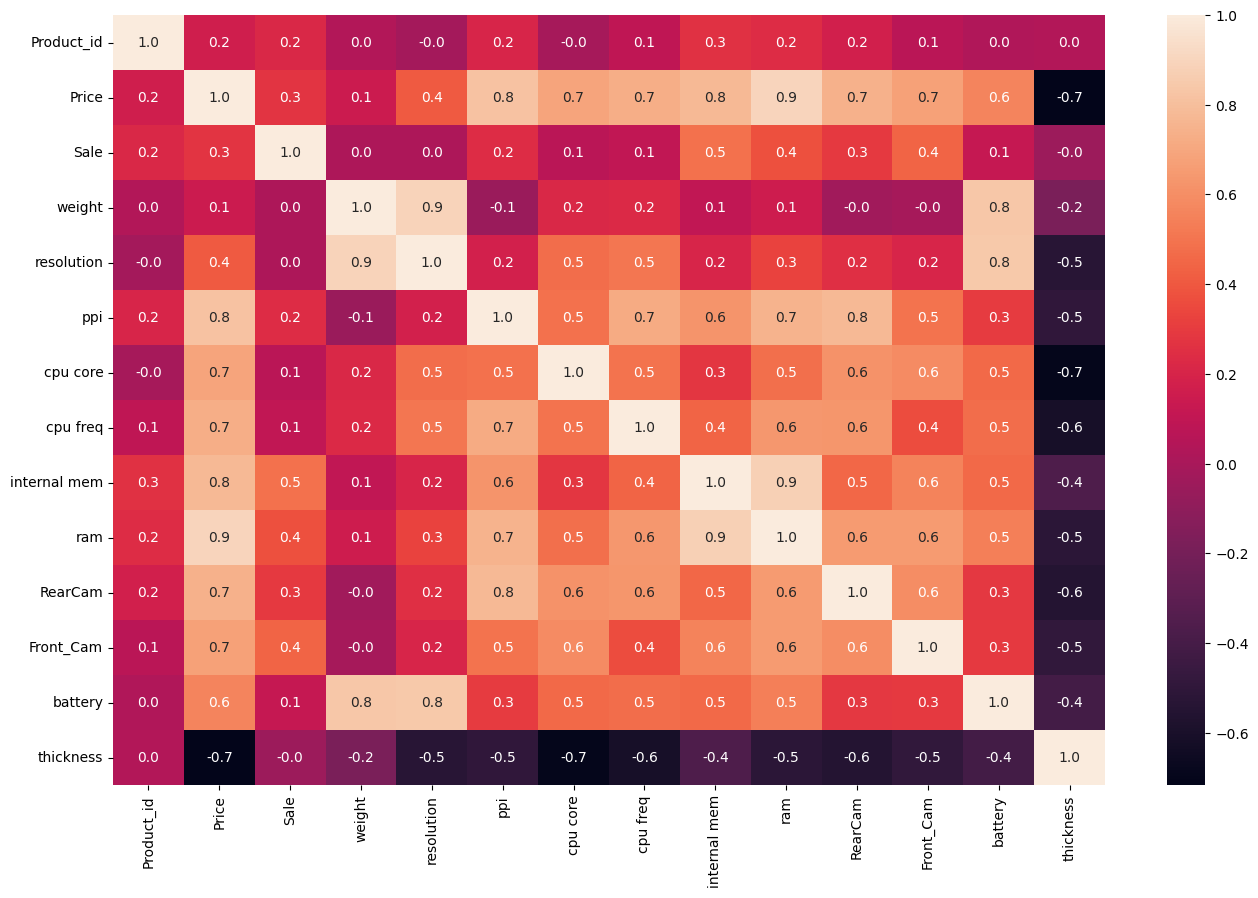

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(mobile.corr(),annot = True,fmt = '.1f')


From the above heatmap it is observed that there is high correlation(0.9) between columns:


*   ram and Price
*   weight and resolution

*   ram and internal mem

Also there is 80% correlation between columns:


*   internal mem and Price
*   battery and weight

*   battery and resolution
*   Price and ppi

*   rear cam and ppi






















Since there is 90% correlation among weight and resolution and internal memory and ram , we need to drop any two columns from them so that the data will not be affected.


*   Since correlation b/w (ram and Price) > (internal mem and Price) , we can drop 'internal mem' column.
*   Since correlation b/w (resolution and Price , 0.4) > (weight and Price,0.1) , so we can drop the 'weight' column.



**Target vs other columns**

<Axes: xlabel='ram', ylabel='Price'>

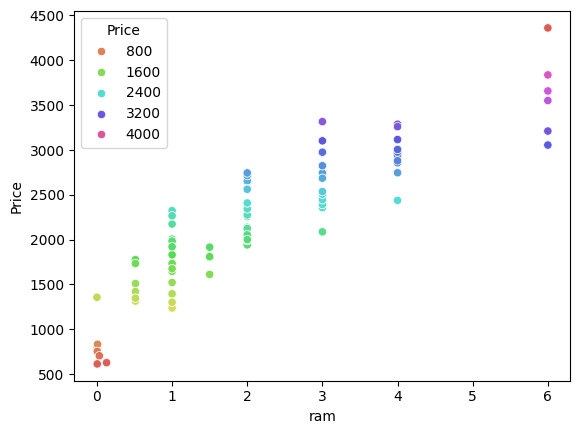

In [10]:
sns.scatterplot(data=mobile,x='ram',y='Price',hue='Price',palette = 'hls')

<Axes: xlabel='resolution', ylabel='Price'>

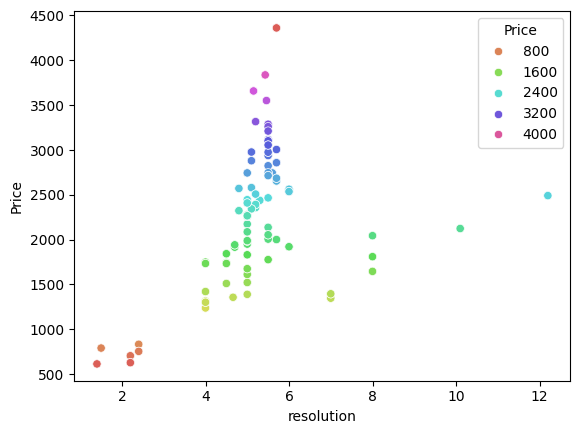

In [11]:
sns.scatterplot(data=mobile,x='resolution',y='Price',hue='Price',palette = 'hls')

We need to remove outliers in resolution column.

# UNIVARIATE ANALYSIS

<Axes: xlabel='Price', ylabel='Count'>

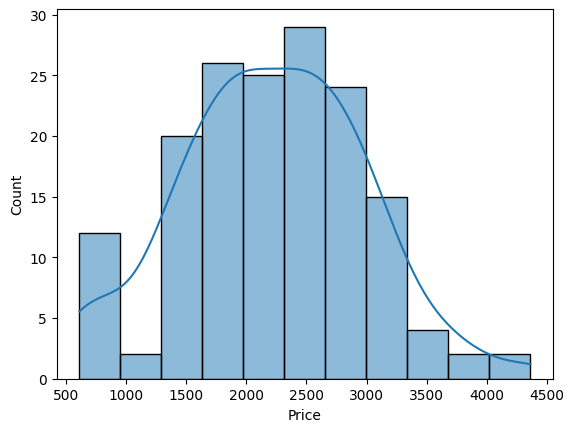

In [12]:
sns.histplot(mobile['Price'],kde=True)

Outliers : NO

<Axes: xlabel='ram', ylabel='Count'>

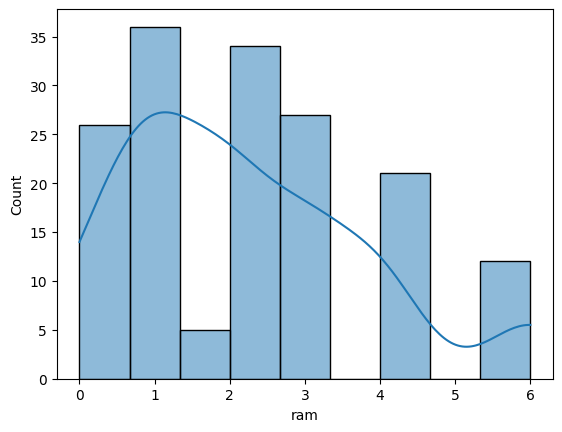

In [13]:
sns.histplot(mobile['ram'],kde=True)

OUTLIERS : YES

<Axes: xlabel='resolution', ylabel='Count'>

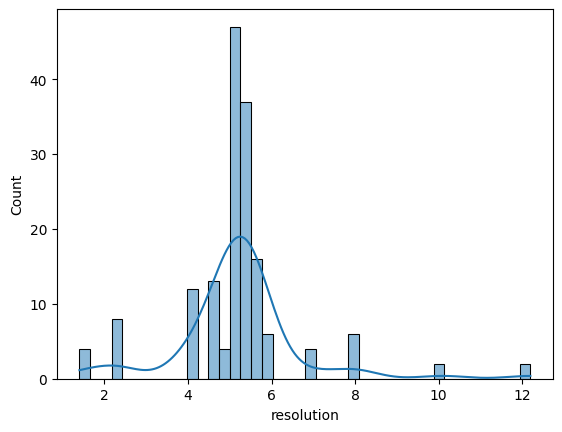

In [14]:
sns.histplot(mobile['resolution'],kde =True)

OUTLIERS : YES

<Axes: xlabel='ppi', ylabel='Count'>

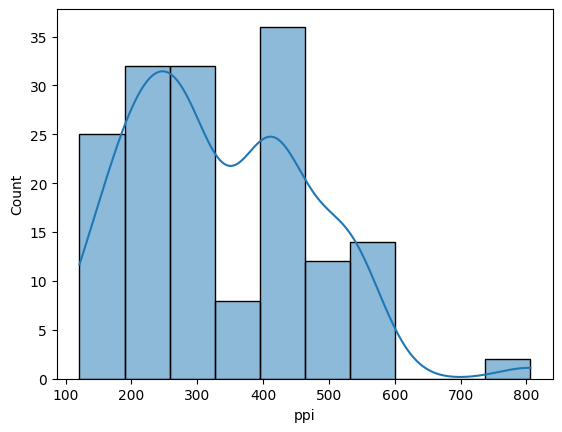

In [15]:
sns.histplot(mobile['ppi'],kde =True)

OUTLIERS : YES

<Axes: xlabel='RearCam', ylabel='Count'>

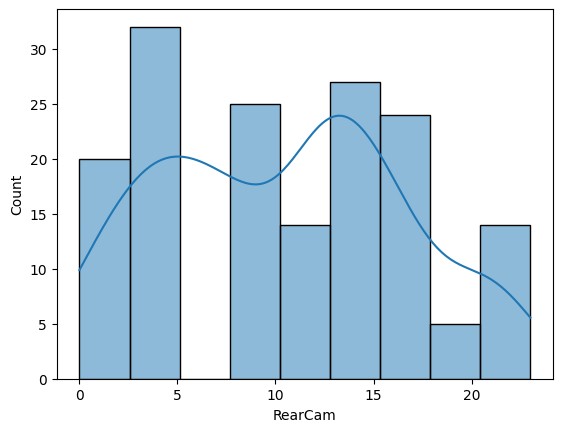

In [16]:
sns.histplot(mobile['RearCam'],kde =True)

OUTLIERS : NO

<Axes: xlabel='Front_Cam', ylabel='Count'>

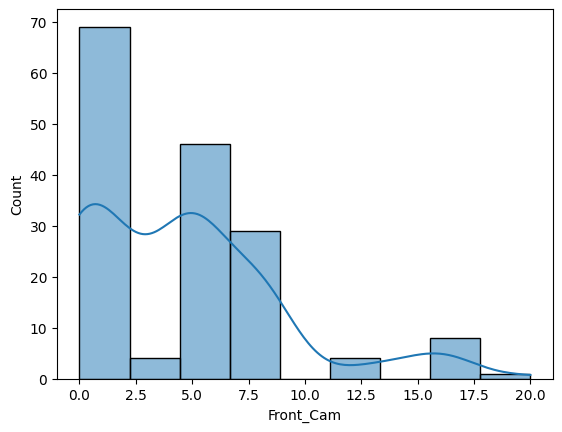

In [17]:
sns.histplot(mobile['Front_Cam'],kde =True)

OUTLIERS: YES

<Axes: xlabel='battery', ylabel='Count'>

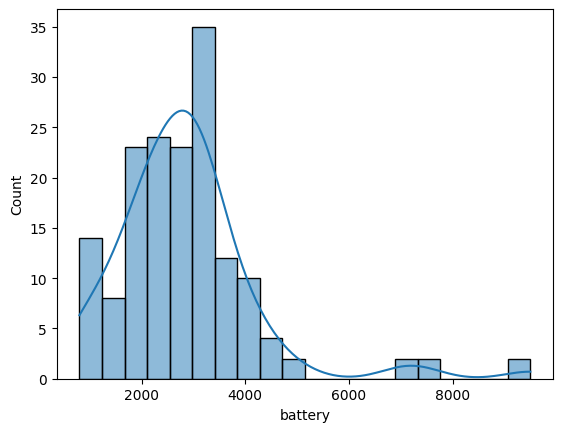

In [18]:
sns.histplot(mobile['battery'],kde =True)

OUTLIERS: YES

<Axes: xlabel='Sale', ylabel='Count'>

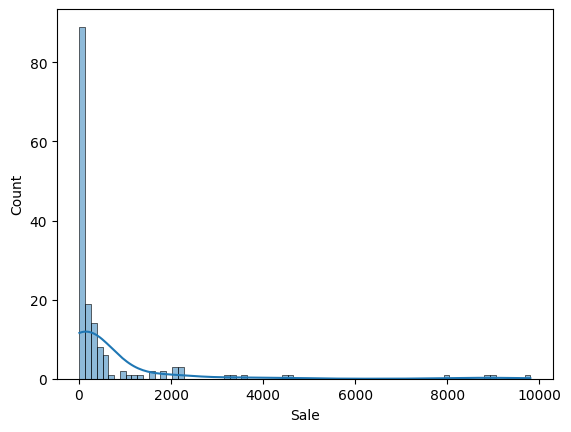

In [19]:
sns.histplot(mobile['Sale'],kde =True)

OUTLIERS: YES

In [20]:
mobile['cpu core'].value_counts()


,count
cpu core,
4,81
8,52
2,14
0,10
6,2
1,2


<Axes: ylabel='count'>

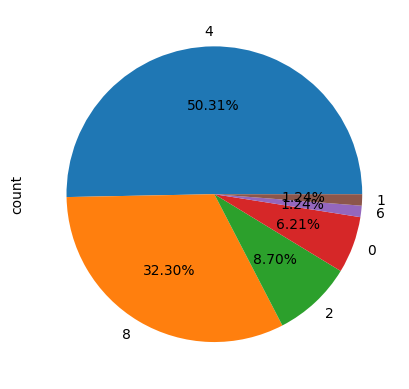

In [21]:
mobile['cpu core'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: ylabel='cpu freq'>

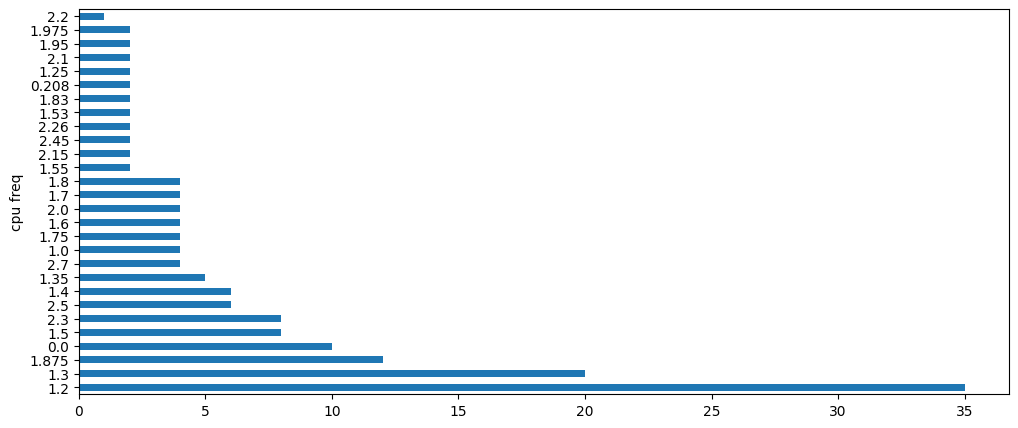

In [22]:
plt.figure(figsize=(12,5))
mobile['cpu freq'].value_counts().plot(kind='barh')

<Axes: xlabel='cpu freq', ylabel='Count'>

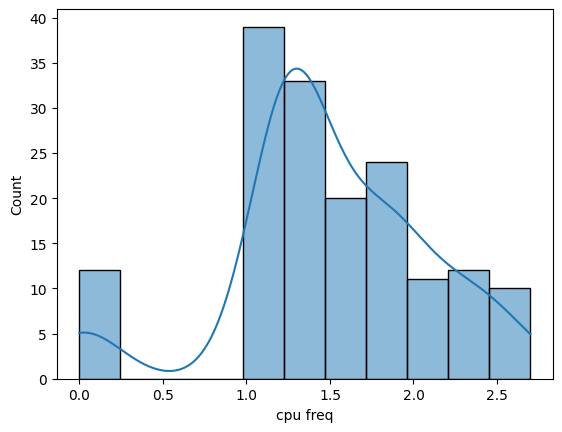

In [23]:
sns.histplot(mobile['cpu freq'],kde =True)

OUTLIERS: YES

<Axes: xlabel='thickness', ylabel='Count'>

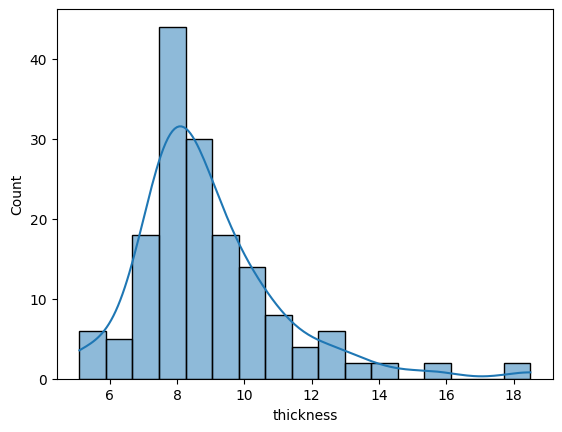

In [24]:
sns.histplot(mobile['thickness'],kde =True)

OUTLIERS: yes

On observing the above Histplots we can see that there are some outliers in the columns:
resolution,FrontCam,battery,Sale,ppi and thickness.


**REMOVING OUTLIERS USING INTER QUARTILE RANGE**

In [25]:
for i  in mobile.columns:
    Q1 = mobile[i].quantile(0.25)
    Q3 = mobile[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mobile = mobile[(mobile[i] >= lower_bound) & (mobile[i] <= upper_bound)]

COLUMNS DISTRIBUTION AFTER REMOVING OUTLIERS

<Axes: xlabel='resolution', ylabel='Count'>

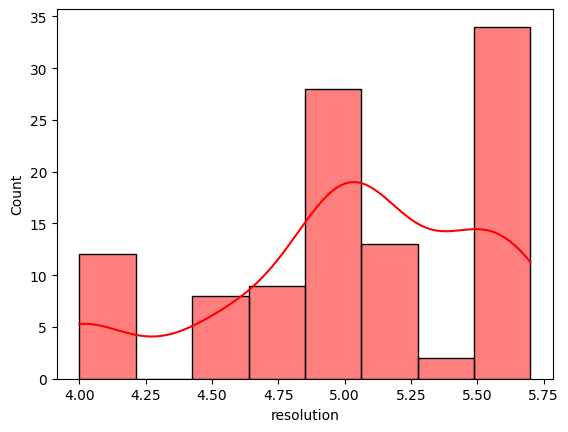

In [26]:
sns.histplot(mobile['resolution'],kde =True,color='red')

<Axes: xlabel='Front_Cam', ylabel='Count'>

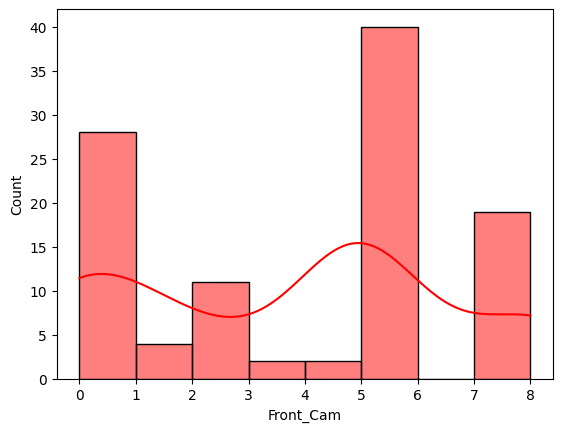

In [27]:
sns.histplot(mobile['Front_Cam'],kde =True,color='red')

<Axes: xlabel='battery', ylabel='Count'>

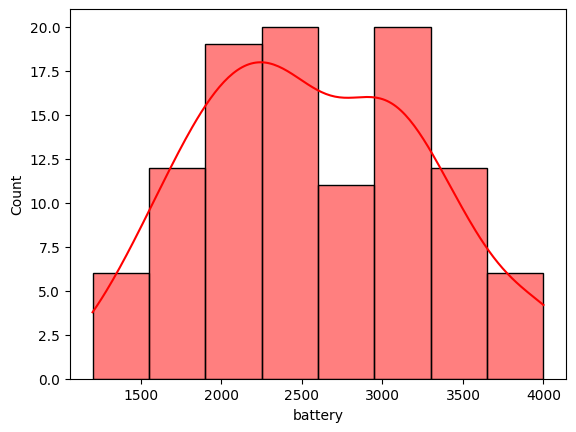

In [28]:
sns.histplot(mobile['battery'],kde =True,color='red')

<Axes: ylabel='cpu freq'>

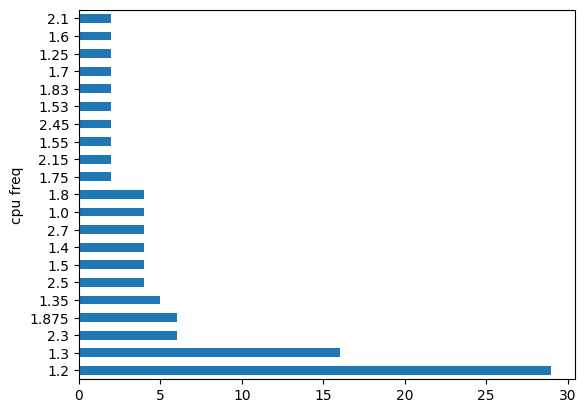

In [29]:
mobile['cpu freq'].value_counts().plot(kind='barh')

<Axes: xlabel='cpu freq', ylabel='Count'>

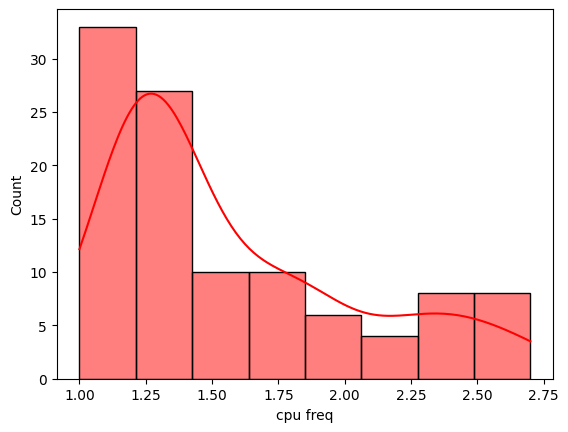

In [30]:
sns.histplot(mobile['cpu freq'],kde =True,color='red')

<Axes: xlabel='Sale', ylabel='Count'>

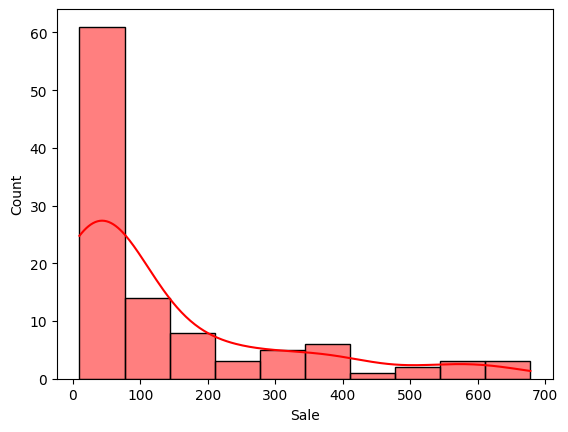

In [31]:
sns.histplot(mobile['Sale'],kde =True,color='red')

<Axes: xlabel='ppi', ylabel='Count'>

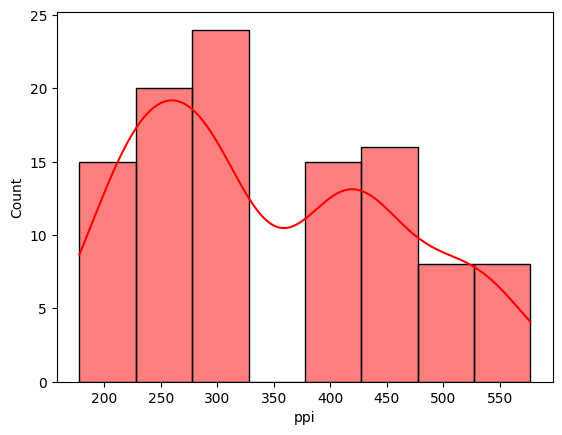

In [32]:
sns.histplot(mobile['ppi'],kde =True,color='red')

<Axes: xlabel='thickness', ylabel='Count'>

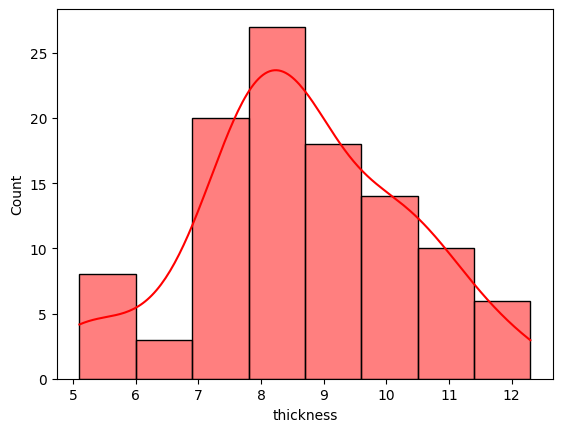

In [33]:
sns.histplot(mobile['thickness'],kde =True,color='red')

**Dropping Columns**

We don't need columns like Product_id,weight and internal mem .

In [34]:
mobile = mobile.drop(columns = {'Product_id','weight','internal mem'})

In [35]:
mobile.head()

,Price,Sale,resolution,ppi,cpu core,cpu freq,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,5.2,424,8,1.35,3.000,13.00,8.0,2610,7.4
1,1749,10,4.0,233,2,1.30,1.000,3.15,0.0,1700,9.9
2,1916,10,4.7,312,4,1.20,1.500,13.00,5.0,2000,7.6
3,1315,11,4.0,233,2,1.30,0.512,3.15,0.0,1400,11.0
4,1749,11,4.0,233,2,1.30,1.000,3.15,0.0,1700,9.9


In [36]:
mobile.shape

(106, 11)

In [37]:
mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,106.0,2220.650943,573.549019,1238.0,1749.0,2216.00,2714.00,3658.0
Sale,106.0,137.688679,168.101690,10.0,25.0,57.00,198.00,678.0
resolution,106.0,5.033208,0.503032,4.0,4.8,5.00,5.50,5.7
ppi,106.0,345.047170,111.225672,178.0,245.0,294.00,432.00,577.0
cpu core,106.0,5.056604,2.105911,2.0,4.0,4.00,8.00,8.0
cpu freq,106.0,1.573774,0.463670,1.0,1.2,1.35,1.83,2.7
ram,106.0,2.062453,1.285368,0.0,1.0,2.00,3.00,6.0
RearCam,106.0,10.977358,5.376311,2.0,8.0,12.00,16.00,21.0
Front_Cam,106.0,3.735849,2.844081,0.0,0.9,5.00,5.00,8.0
battery,106.0,2573.584906,701.008714,1200.0,2010.0,2500.00,3050.00,4000.0


# FEATURE SCALING

In [38]:
from sklearn.preprocessing import StandardScaler

target = 'Price'
scaler = StandardScaler()
feature_columns = [col for col in mobile.columns if col != target]
mobile[feature_columns] = scaler.fit_transform(mobile[feature_columns])

In [39]:
mobile.head()

,Price,Sale,resolution,ppi,cpu core,cpu freq,ram,RearCam,Front_Cam,battery,thickness
0,2357,-0.763200,0.333150,0.713216,1.404323,-0.484907,0.732865,0.378001,1.506430,0.052193,-0.744694
1,1749,-0.763200,-2.063718,-1.012172,-1.458335,-0.593254,-0.830501,-1.462814,-1.319792,-1.252103,0.768680
2,1916,-0.763200,-0.665545,-0.298530,-0.504116,-0.809949,-0.439660,0.378001,0.446596,-0.822115,-0.623624
3,1315,-0.757223,-2.063718,-1.012172,-1.458335,-0.593254,-1.211963,-1.462814,-1.319792,-1.682091,1.434564
4,1749,-0.757223,-2.063718,-1.012172,-1.458335,-0.593254,-0.830501,-1.462814,-1.319792,-1.252103,0.768680


# TRAIN_TEST_SPLIT

In [40]:
y = mobile['Price']
X = mobile.drop(columns = {'Price'})

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84, 10)
(84,)
(22, 10)
(22,)


# MODEL FITTING

**Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Slope',model.coef_)
print('Intercept',model.intercept_)
print('MAE',mae)

r2_score = model.score(X_test,y_test)
print('Accuracy in r^2',r2_score*100)

Slope [ -20.13984934  -48.71262292  135.18714616  141.40999955   52.03370661
  209.87104789    5.8450521   -34.82457193  124.13646719 -154.93221746]
Intercept 2215.7140448480004
MAE 177.57574583044868
Accuracy in r^2 81.628773143775


The accuracy of the Linear regression model is 81% seems like the model is not working properly.
So let us try with random forest.

**RandomForest Regressor**

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_predict = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Absolute Error:",mae)
print("R² Score:",r2*100)

Mean Absolute Error: 137.0222727272727
R² Score: 83.81549670978458


The accuracy for the random forest model is 83%, i.e. a 2% is improved.So this model can be used for predictions and deployment.


1. **Exploratory Data Analysis (EDA)**

•	*Univariate analysis*: Histograms and countplots to understand distribution of individual features.

•	*Bivariate analysis*: Correlation heatmaps and scatter plots to observe linear relationships with price.

•	*Findings*:
Strong positive correlation: RAM, battery_power.

Outliers and skewness were observed in some numerical features.
2. **Preprocessing**

•	*Missing Values*: Checked and handled if any (not many were found).

•	*Feature Scaling*: Used StandardScaler to standardize continuous features.

•	*Data Splitting*: Used train_test_split to divide data into training and testing sets, typically in a  80-20 ratio.

3. **Model Building**

•	*Linear Regression*:

Applied as a baseline model.
  
Worked decently but struggled with non-linear patterns in the data.

•	*Random Forest Regressor*:

Significantly improved performance.

Handled non-linear relationships effectively.

Provided feature importance rankings.

4. **Model Evaluation**

•	*Evaluation metrics used*:

R² score: Achieved an accuracy of 83 with Random Forest AND 81 with Linear Regresion.

MAE:Obtained Mean Absolute Error of ~137 using Random forest regressor  which is less than MAE of Linear Regression which is ~172.

